# PRODIGY INFOTECH 
## DATA SCIENCE INTERNSHIP

AGNES ANTONY

## TASK 5

Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import folium

In [2]:
data=pd.read_csv('task5_data.csv')

In [3]:
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
data.tail()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day
7728393,A-7777761,Source1,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
data.shape

(7728394, 46)

In [7]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [9]:
data.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [10]:
df_num=data.select_dtypes(np.number)

In [11]:
df_num

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,39.865147,-84.058723,NaN,NaN,0.010,36.9,NaN,91.0,29.68,10.0,NaN,0.02
1,2,39.928059,-82.831184,NaN,NaN,0.010,37.9,NaN,100.0,29.65,10.0,NaN,0.00
2,2,39.063148,-84.032608,NaN,NaN,0.010,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,3,39.747753,-84.205582,NaN,NaN,0.010,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,2,39.627781,-84.188354,NaN,NaN,0.010,36.0,33.3,89.0,29.65,6.0,3.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,2,34.002480,-117.379360,33.99888,-117.37094,0.543,86.0,86.0,40.0,28.92,10.0,13.0,0.00
7728390,2,32.766960,-117.148060,32.76555,-117.15363,0.338,70.0,70.0,73.0,29.39,10.0,6.0,0.00
7728391,2,33.775450,-117.847790,33.77740,-117.85727,0.561,73.0,73.0,64.0,29.74,10.0,10.0,0.00
7728392,2,33.992460,-118.403020,33.98311,-118.39565,0.772,71.0,71.0,81.0,29.62,10.0,8.0,0.00


In [12]:
df_num.isnull().sum()

Severity                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              3402762
End_Lng              3402762
Distance(mi)               0
Temperature(F)        163853
Wind_Chill(F)        1999019
Humidity(%)           174144
Pressure(in)          140679
Visibility(mi)        177098
Wind_Speed(mph)       571233
Precipitation(in)    2203586
dtype: int64

In [13]:
impute_columns=['End_Lat','End_Lng','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']
for i in range(0,len(impute_columns)):
    imputer=SimpleImputer(strategy='mean')
    column_to_impute = df_num[impute_columns[i]].values.reshape(-1, 1)
    imputer.fit(column_to_impute)
    imputed_column = imputer.transform(column_to_impute)
    df_num[impute_columns[i]] = imputed_column
    

In [14]:
df_num.isnull().sum()

Severity             0
Start_Lat            0
Start_Lng            0
End_Lat              0
End_Lng              0
Distance(mi)         0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
dtype: int64

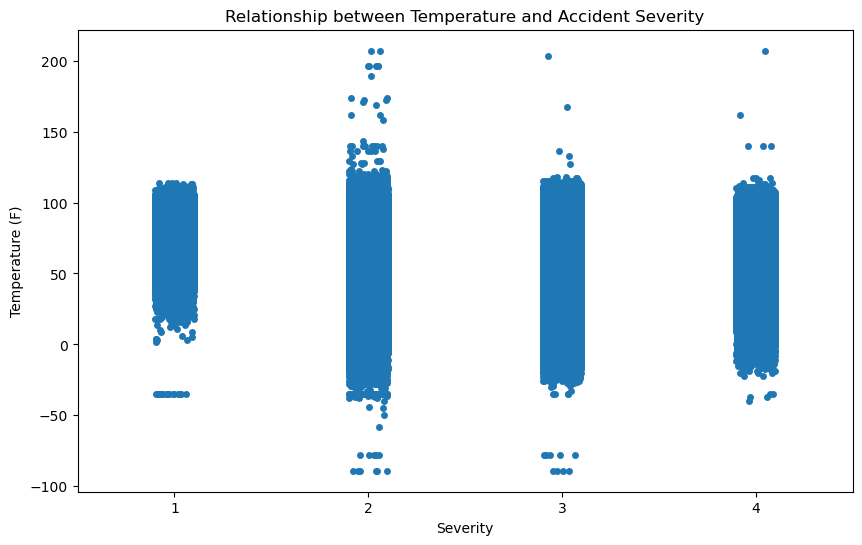

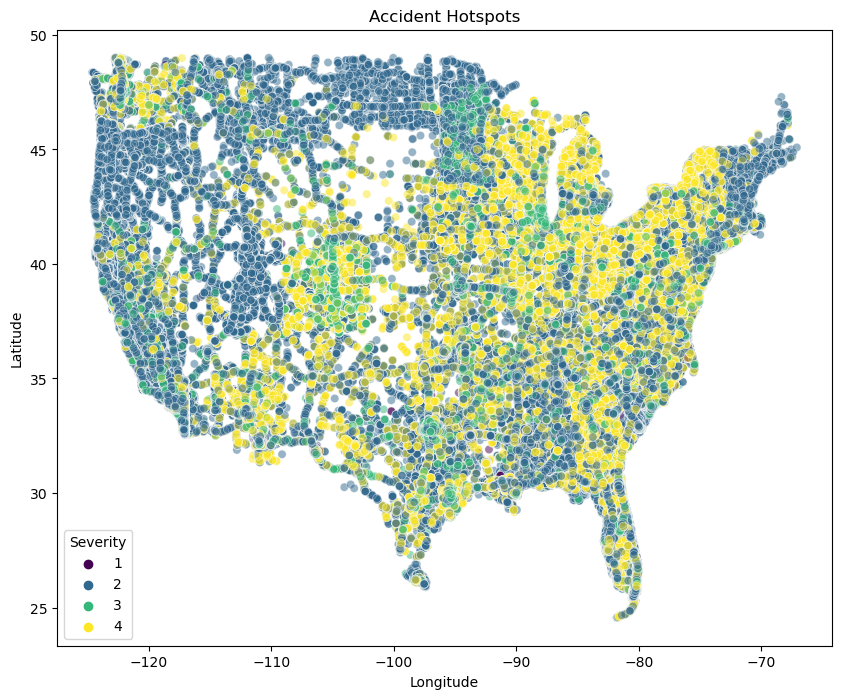

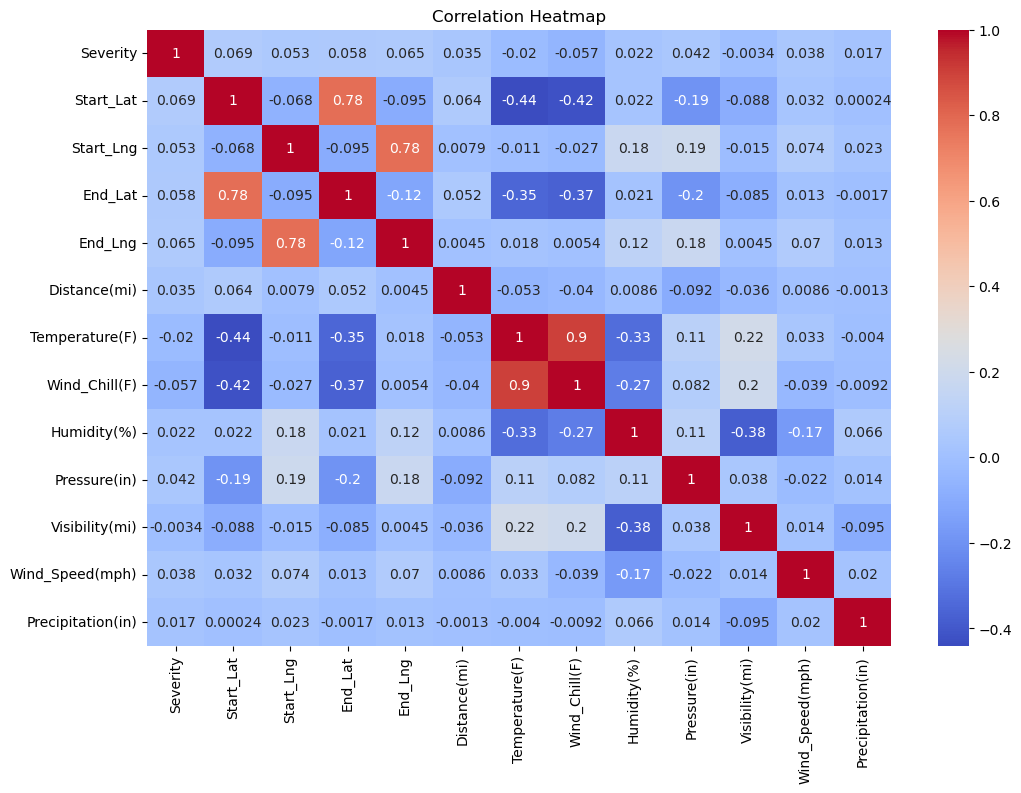

In [15]:
# Data Analysis
# Example: Relationship between temperature and accident severity
plt.figure(figsize=(10, 6))
sns.stripplot(x='Severity', y='Temperature(F)', data=df_num, jitter=True)
plt.title('Relationship between Temperature and Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Temperature (F)')
plt.show()

# Example: Accident hotspots visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='Severity', data=df_num, palette='viridis', alpha=0.5)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Severity')
plt.show()

# Example: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

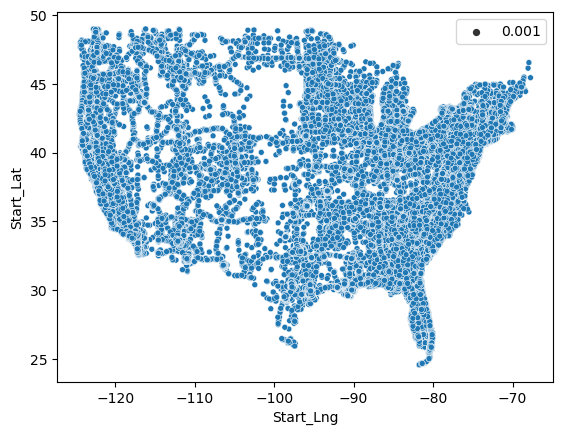

In [16]:
sample_df=df_num.sample(int(0.1*len(df_num))) 
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [17]:
from folium.plugins import HeatMap
sample_df = df_num.sample(int(0.001 * len(df_num)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

In [18]:
cities_by_accident = data.City.value_counts()
top20_city = cities_by_accident.head(20)

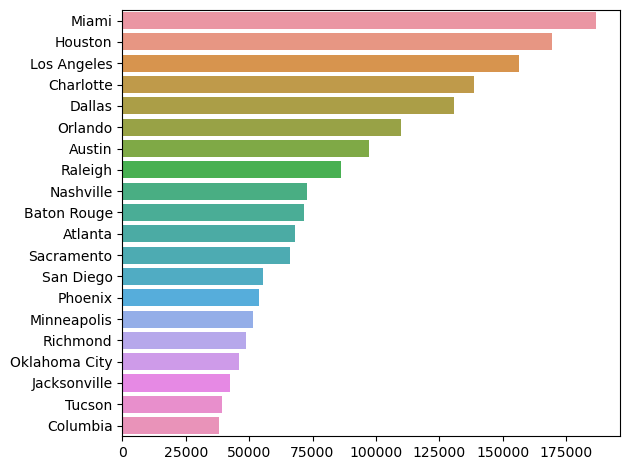

In [19]:
sns.barplot(y=top20_city.keys(),x=top20_city.values)
plt.tight_layout()

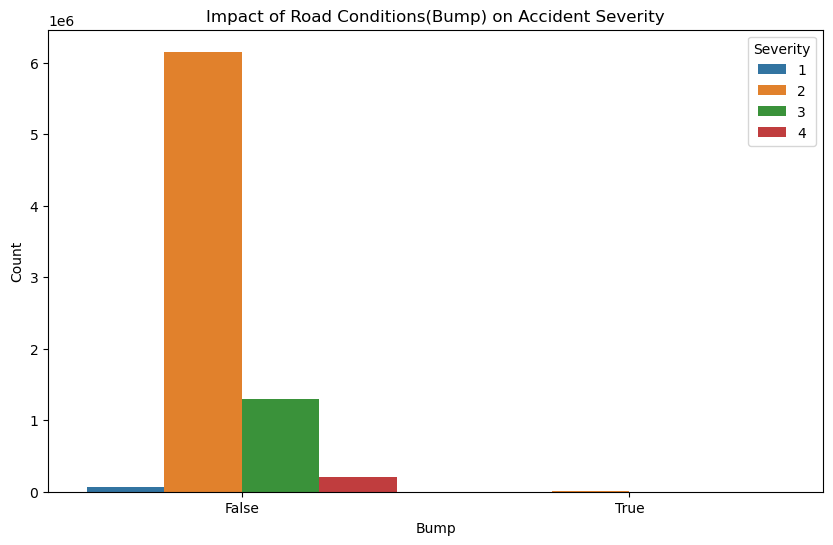

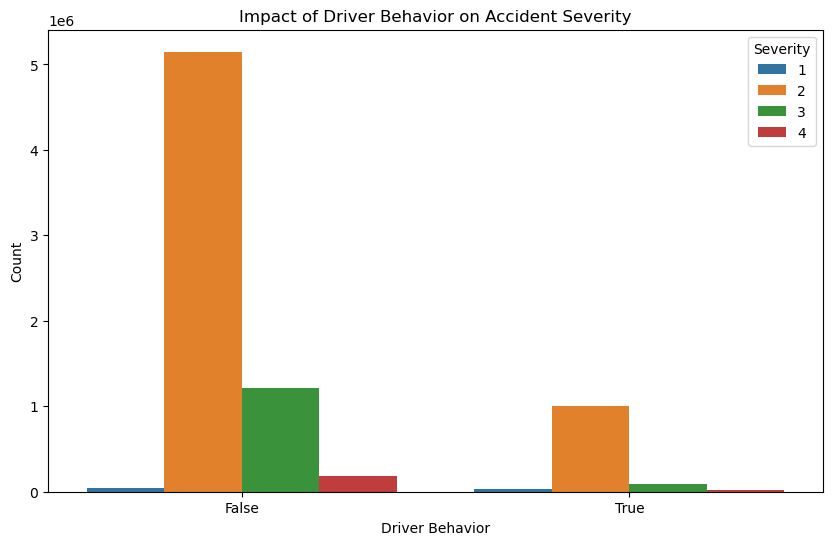

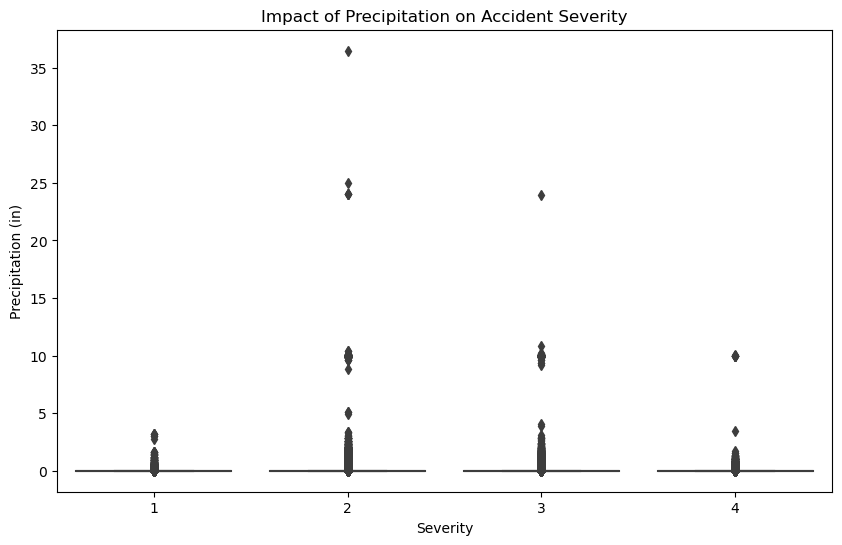

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Bump', hue='Severity', data=data)
plt.title('Impact of Road Conditions(Bump) on Accident Severity')
plt.xlabel('Bump')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.show()

# Visualize the impact of Driver Behavior on Accident Severity
plt.figure(figsize=(10, 6))
sns.countplot(x='Traffic_Signal', hue='Severity', data=data)
plt.title('Impact of Driver Behavior on Accident Severity')
plt.xlabel('Driver Behavior')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.show()

# Visualize the impact of Precipitation on Accident Severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Precipitation(in)', data=data)
plt.title('Impact of Precipitation on Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Precipitation (in)')
plt.show()

In [21]:
data = data.astype({'Start_Time': 'datetime64[ns]', 'End_Time': 'datetime64[ns]'})
data['Start_Time'].dtypes


dtype('<M8[ns]')

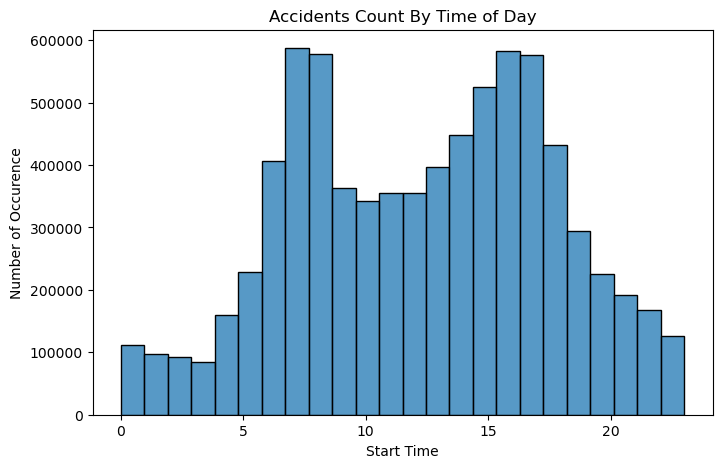

In [22]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

In [23]:
weather_conditions = data["Weather_Condition"].value_counts()
weather_conditions

Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: Weather_Condition, Length: 144, dtype: int64

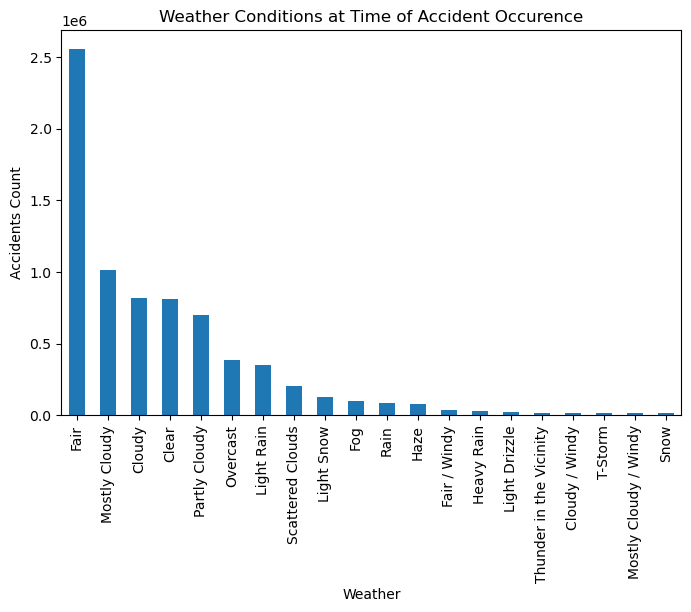

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
weather_conditions.sort_values(ascending=False)[:20].plot(kind='bar')
ax.set(title = 'Weather Conditions at Time of Accident Occurence',
       xlabel = 'Weather',
       ylabel = 'Accidents Count')
plt.show()
